# Final Model

purpose:
- actually tune the coefficients for the function in the final model (and write up functions to run the final model)

In [1]:
import pandas as pd
from statistics import mean, stdev 

## Load and Prepare data

training

In [2]:
merchant_train = pd.read_csv('../data/curated/final_model/input/agg_fortnightly_mean_sd_marketcorr_train_NOFRAUD.csv')
merchant_validate = pd.read_csv('../data/curated/final_model/input/agg_fortnightly_mean_sd_marketcorr_validate_NOFRAUD.csv')
merchant_overall = pd.read_csv('../data/curated/final_model/input/agg_fortnightly_mean_sd_marketcorr_NOFRAUD.csv')

merchant_fortnight_train = pd.read_csv('../data/curated/final_model/input/fortnightly_agg_merchant_transactions_train_NOFRAUD.csv')
merchant_fortnight_validate = pd.read_csv('../data/curated/final_model/input/fortnightly_agg_merchant_transactions_validate_NOFRAUD.csv')
merchant_fortnight= pd.read_csv('../data/curated/final_model/input/fortnightly_agg_merchant_transactions_NOFRAUD.csv')

In [3]:
loyalty_train = pd.read_csv('../data/curated/final_model/input/loyalty_train.csv')
loyalty_train = loyalty_train[['merchant_abn', 'repeated_purchase_rate']]

loyalty_overall = pd.read_csv(('../data/curated/final_model/input/loyalty_full.csv'))
loyalty_overall = loyalty_train[['merchant_abn', 'repeated_purchase_rate']]

In [4]:
persona_train = pd.read_csv('../data/curated/final_model/input/persona_train.csv')

persona_overall = pd.read_csv(('../data/curated/final_model/input/persona_full.csv'))

In [6]:
# merge dataset with 4th to 5th variable
merchant_train = merchant_train.merge(loyalty_train, on='merchant_abn', how='inner')
merchant_train = merchant_train.merge(persona_train, on='merchant_abn', how='inner')

merchant_train

,merchant_abn,mean,stdev,n_periods,corr,covar,beta,weighted E(r),repeated_purchase_rate,persona_score
0,10023283211,70749.673866,18636.265281,23,0.924841,2.089959e+11,0.001421,-0.323900,0.036760,0.003602
1,10142254217,22397.234199,7661.654456,23,0.848513,7.883019e+10,0.000536,-0.380866,0.041188,0.004071
2,10187291046,6739.845784,3296.685077,23,0.356489,1.425068e+10,0.000097,-0.589436,0.000000,0.003787
3,10192359162,41976.201423,19772.703184,23,0.503911,1.208179e+11,0.000822,-0.551896,0.000000,0.005775
4,10206519221,90606.920640,25122.144347,23,0.945070,2.878939e+11,0.001958,-0.383000,0.107863,0.003607
...,...,...,...,...,...,...,...,...,...,...
4339,99938978285,106653.055688,25983.036269,23,0.978122,3.081731e+11,0.002096,-0.395115,0.175840,0.003789
4340,99974311662,6155.721098,3952.631998,23,0.301563,1.445361e+10,0.000098,-0.351165,0.000000,0.003838
4341,99976658299,877875.375777,223217.077839,23,0.983820,2.662900e+12,0.018111,-0.391975,0.231100,0.003747
4342,99987905597,13342.109019,7503.391891,23,0.349577,3.180625e+10,0.000216,-0.378324,0.000000,0.001920


In [7]:
merchant_train['standardised stdev'] = merchant_train['stdev']/merchant_train['mean']

In [8]:
merchant_train.describe()

,merchant_abn,mean,stdev,n_periods,corr,covar,beta,weighted E(r),repeated_purchase_rate,persona_score,standardised stdev,sharpe ratio
count,4.344000e+03,4.344000e+03,4344.000000,4344.000000,4295.000000,4.295000e+03,4295.000000,4344.000000,4344.000000,4344.000000,4344.000000,4344.000000
mean,5.471355e+10,9.997206e+04,31931.351240,22.343692,0.534169,3.013706e+11,0.002050,-0.308450,0.028709,0.004312,0.720019,2.244391
std,2.594273e+10,2.390322e+05,59617.599173,2.212615,0.398175,7.091202e+11,0.004823,1.834591,0.081238,0.006134,0.643653,1.247310
min,1.002328e+10,2.665122e+02,693.015485,3.000000,-1.000000,-3.171614e+11,-0.002157,-0.621248,0.000000,0.000000,0.173710,0.208514
25%,3.193214e+10,6.676722e+03,5592.659720,23.000000,0.295828,1.674197e+10,0.000114,-0.394782,0.000000,0.003103,0.302066,1.125606
50%,5.483252e+10,2.359680e+04,13487.074419,23.000000,0.619372,7.973185e+10,0.000542,-0.388627,0.004040,0.003750,0.471073,2.122814
75%,7.672848e+10,1.040795e+05,36499.124237,23.000000,0.869536,3.268883e+11,0.002223,-0.367884,0.020814,0.004273,0.888410,3.310538
max,9.999054e+10,2.429041e+06,643948.554260,23.000000,1.000000,7.429117e+12,0.050526,102.090732,0.987563,0.212823,4.795832,5.756730


In [9]:
merchant_train['corr'] = merchant_train['corr'] * 100000
merchant_train['repeated_purchase_rate'] = merchant_train['repeated_purchase_rate'] * 1000000
merchant_train['persona_score'] = merchant_train['persona_score'] * 10000000

merchant_train['standardised stdev'] = merchant_train['standardised stdev'] * 100000

In [10]:
merchant_train.describe()

,merchant_abn,mean,stdev,n_periods,corr,covar,beta,weighted E(r),repeated_purchase_rate,persona_score,standardised stdev,sharpe ratio
count,4.344000e+03,4.344000e+03,4344.000000,4344.000000,4295.000000,4.295000e+03,4295.000000,4.344000e+03,4344.000000,4.344000e+03,4344.000000,4344.000000
mean,5.471355e+10,9.997206e+04,31931.351240,22.343692,53416.858494,3.013706e+11,0.002050,-3.084496e+04,28709.276798,4.311539e+04,72001.933430,22443.911906
std,2.594273e+10,2.390322e+05,59617.599173,2.212615,39817.521039,7.091202e+11,0.004823,1.834591e+05,81238.037184,6.133957e+04,64365.302636,12473.102776
min,1.002328e+10,2.665122e+02,693.015485,3.000000,-100000.000000,-3.171614e+11,-0.002157,-6.212476e+04,0.000000,0.000000e+00,17370.972387,2085.144141
25%,3.193214e+10,6.676722e+03,5592.659720,23.000000,29582.827156,1.674197e+10,0.000114,-3.947816e+04,0.000000,3.103131e+04,30206.570525,11256.062536
50%,5.483252e+10,2.359680e+04,13487.074419,23.000000,61937.207234,7.973185e+10,0.000542,-3.886265e+04,4040.420530,3.750275e+04,47107.287538,21228.137992
75%,7.672848e+10,1.040795e+05,36499.124237,23.000000,86953.596674,3.268883e+11,0.002223,-3.678837e+04,20814.208486,4.273354e+04,88841.021740,33105.381216
max,9.999054e+10,2.429041e+06,643948.554260,23.000000,100000.000000,7.429117e+12,0.050526,1.020907e+07,987563.430663,2.128228e+06,479583.152331,57567.301225


overall

In [11]:
# merge dataset with 4th variable
merchant_overall = merchant_overall.merge(loyalty_overall, on='merchant_abn', how='inner')
merchant_overall = merchant_overall.merge(persona_overall, on='merchant_abn', how='inner')

merchant_overall

,merchant_abn,mean,stdev,n_periods,corr,covar,beta,weighted E(r),repeated_purchase_rate,persona_score
0,10023283211,71944.954088,15268.757666,38,0.898658,1.663833e+11,0.001132,-0.506826,0.036760,0.004553
1,10142254217,22687.034837,6496.702667,38,0.801093,6.310849e+10,0.000429,-0.523320,0.041188,0.004740
2,10187291046,6831.716274,3379.999688,38,0.349956,1.434304e+10,0.000098,-0.374233,0.000000,0.004666
3,10192359162,40955.314495,17639.407542,38,0.472340,1.010300e+11,0.000687,-0.539180,0.000000,0.006020
4,10206519221,88038.400673,21292.527062,38,0.921726,2.379801e+11,0.001619,-0.506193,0.107863,0.004468
...,...,...,...,...,...,...,...,...,...,...
4343,99938978285,106551.591313,21699.148448,38,0.959032,2.523407e+11,0.001716,-0.539419,0.175840,0.004735
4344,99974311662,6326.735554,4783.350900,38,0.169271,9.818105e+09,0.000067,-0.393847,0.000000,0.006811
4345,99976658299,871306.137224,186985.910229,38,0.978855,2.219417e+12,0.015094,-0.531831,0.231100,0.004723
4346,99987905597,16290.096561,10052.773545,38,0.258865,3.155515e+10,0.000215,-0.357825,0.000000,0.003205


In [12]:
merchant_overall['standardised stdev'] = merchant_overall['stdev']/merchant_overall['mean']

In [13]:
merchant_overall['corr'] = merchant_overall['corr'] * 100000
merchant_overall['repeated_purchase_rate'] = merchant_overall['repeated_purchase_rate'] * 1000000
merchant_overall['persona_score'] = merchant_overall['persona_score'] * 10000000

merchant_overall['standardised stdev'] = merchant_overall['standardised stdev'] * 100000

# Define functions

First write function that gets scores of all stores

In [14]:
# sometimes std/covar has nan values, fill them with 0
merchant_overall = merchant_overall.fillna(0)
merchant_train = merchant_train.fillna(0)
merchant_validate = merchant_validate.fillna(0)

a_combo = [1, 1, 1, 1, 1, 1]

In [18]:
def get_hscore(merchant_train, a_combo, k):
    # helper function to get the score for a company using h value input
    VARNAME = ['mean', 'standardised stdev', 'corr', 'repeated_purchase_rate', 'persona_score']

    merchant_train['score'] = a_combo[0] * merchant_train[VARNAME[0]]

    for i in range(1, k):
        merchant_train['score'] = merchant_train['score'] + a_combo[i] * merchant_train[VARNAME[i]]
    
    return merchant_train[['merchant_abn', 'score']]

In [19]:
# testrun of helper function
merchants_train_score = get_hscore(merchant_train, a_combo, 5)
merchants_train_score

,merchant_abn,score
0,10023283211,2.623555e+05
1,10142254217,2.233530e+05
2,10187291046,1.291713e+05
3,10192359162,1.972234e+05
4,10206519221,3.567695e+05
...,...,...
4339,99938978285,4.425534e+05
4340,99974311662,1.389077e+05
4341,99976658299,1.270256e+06
4342,99987905597,1.237385e+05


Get top 100 and make into portfolio (just a list)

In [20]:
def get_portfolio_abn(merchants_train_score):
    # get the top 100 merchant's abn
    
    sorted_merchants_train_score = merchants_train_score.sort_values(['score'], ascending=False)

    top_100_portfolio = sorted_merchants_train_score.head(100)

    top_portfolio_merchants = list(top_100_portfolio['merchant_abn'])

    return top_portfolio_merchants

In [21]:
# testrun the function
top_portfolio_merchants = get_portfolio_abn(merchants_train_score)
# top_portfolio_merchants

Get Portfolio Stats (load periodic data and add up)

- get portfolio fortnightly E[r] and sd(r) after summing up portfolio transactions for each fortnight and take mean(), std()
- calculate E(r) / sd(r)

In [22]:
def get_sharpe_ratio_of_portfolio(merchant_fortnight_validate, top_portfolio_merchants):
    # calculate the sharpe ratio using the validate

    top_100_portfolio_fortnightly = pd.DataFrame()

    for abn in top_portfolio_merchants:
        tmp = merchant_fortnight_validate[merchant_fortnight_validate['merchant_abn'] == abn]
        top_100_portfolio_fortnightly = pd.concat([top_100_portfolio_fortnightly, tmp])

    top_100_portfolio_fortnightly_agg = top_100_portfolio_fortnightly.groupby(['Year', 'Fortnight']).agg({'sum_transactions': mean})

    top_100_portfolio_fortnightly_mean = mean(top_100_portfolio_fortnightly_agg['sum_transactions'])
    top_100_portfolio_fortnightly_sd = stdev(top_100_portfolio_fortnightly_agg['sum_transactions'])

    portfolio_sharpe_ratio = top_100_portfolio_fortnightly_mean/top_100_portfolio_fortnightly_sd
    
    return portfolio_sharpe_ratio

In [23]:
# testrun the function
portfolio_sharpe_ratio = get_sharpe_ratio_of_portfolio(merchant_fortnight_validate, top_portfolio_merchants)
portfolio_sharpe_ratio

9.01347541793122

# Run Test

Each round we read the top combinations and continue to refine down the values

In [24]:
a_combos = []


for a1 in [0.5, 1, 50]:
    
    for a2 in [-5000, -10000, -50000]:
        
        for a3 in [500000, 1000000, 5000000]:
            
            for a4 in [-5000, -10000, -50000]:
                
                for a5 in [5000, 10000, 50000]:
                    a_combos.append([a1, a2, a3, a4, a5])

len(a_combos)
                    

243

In [30]:
a_combos = []


for a1 in [25, 50, 75]:
    
    for a2 in [-2500, -5000, -7500]:
        
        for a3 in [500000, 1000000, 5000000]:
            
            for a4 in [-5000, -10000, -50000]:
                
                for a5 in [25000, 50000, 75000]:
                    a_combos.append([a1, a2, a3, a4, a5])

len(a_combos)
                    

243

In [42]:
a_combos = []


for a1 in [75-12.5, 75, 75+12.5]:
    # a_combos.append([a1])
    for a2 in [-3500+100*i for i in range(20)]:
        # a_combos.append([a1, a2])
        for a3 in [900000 + 10000*i for i in range(20)]:
            # a_combos.append([a1, a2, a3])
            for a4 in [-15000+1000*i for i in range(10)]:
                # a_combos.append([a1, a2, a3, a4])
                for a5 in [60000+1000*i for i in range(30)]:
                    a_combos.append([a1, a2, a3, a4, a5])

len(a_combos)
                    

360000

In [52]:
a_combos = []


for a1 in [60 + 2*i for i in range(4)]:
    for a2 in [-2350 + 50*i for i in range(7)]:
        for a3 in [1057500 + 2500*i for i in range(6)]:
            for a4 in [-7500 + 500*i for i in range(7)]:
                for a5 in [59750 + 250*i for i in range(6)]:
                    a_combos.append([a1, a2, a3, a4, a5])

len(a_combos)
                    

7056

In [64]:
a_combos = []

for a1 in [58+i for i in range(5)]:
    for a2 in [-2300]:
        for a3 in [1055000 + 1000*i for i in range(6)]:
            for a4 in [-6000]:
                for a5 in [60250]:
                    a_combos.append([a1, a2, a3, a4, a5])

len(a_combos)
                    

30

In [65]:
all_sharpe_ratios = list()

for a_combo in a_combos:
    merchants_train_score = get_hscore(merchant_train, a_combo, 5)

    top_portfolio_merchants = get_portfolio_abn(merchants_train_score)

    portfolio_sharpe_ratio = get_sharpe_ratio_of_portfolio(merchant_fortnight_validate, top_portfolio_merchants)

    all_sharpe_ratios.append(portfolio_sharpe_ratio)

In [66]:
results = pd.DataFrame({'all_combos': a_combos, 'sharpe_ratio': all_sharpe_ratios}).sort_values(['sharpe_ratio'], ascending = False)

# Analyse Results

In [67]:
results.head(60)

,all_combos,sharpe_ratio
0,"[58, -2300, 1055000, -6000, 60250]",14.626958
10,"[59, -2300, 1059000, -6000, 60250]",14.626958
19,"[61, -2300, 1056000, -6000, 60250]",14.626958
18,"[61, -2300, 1055000, -6000, 60250]",14.626958
1,"[58, -2300, 1056000, -6000, 60250]",14.626958
14,"[60, -2300, 1057000, -6000, 60250]",14.626958
13,"[60, -2300, 1056000, -6000, 60250]",14.626958
12,"[60, -2300, 1055000, -6000, 60250]",14.626958
11,"[59, -2300, 1060000, -6000, 60250]",14.626958
15,"[60, -2300, 1058000, -6000, 60250]",14.626958


In [63]:
results.describe()


,sharpe_ratio
count,3.000000e+01
mean,1.043716e+01
std,9.033621e-15
min,1.043716e+01
25%,1.043716e+01
50%,1.043716e+01
75%,1.043716e+01
max,1.043716e+01


array([[<AxesSubplot:title={'center':'sharpe_ratio'}>]], dtype=object)

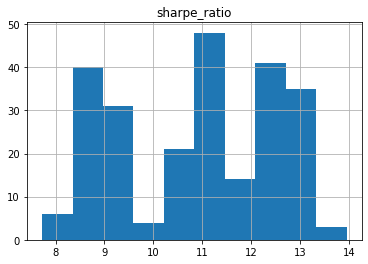

In [29]:
results.hist()

In [31]:
results.to_csv('../data/curated/final_model/output/5_vars_standardised.csv', index=False)

# Get best combination

In [68]:
final_a_combo = [60, -2300, 1057500, -6000, 60250]

In [69]:
merchants_overall_score = get_hscore(merchant_overall, final_a_combo, 5)

final_top_portfolio_merchants = get_portfolio_abn(merchants_overall_score)

In [80]:
final_100_with_score = merchants_overall_score.sort_values(['score'], ascending=False).head(100)
final_100_with_score

,merchant_abn,score
2316,57564805948,1.423930e+11
1054,31400548982,1.259198e+11
1935,49465266764,1.129854e+11
2552,62789659343,1.077813e+11
4335,99801770627,1.077535e+11
...,...,...
3861,89502033586,1.046330e+11
1937,49505931725,1.046236e+11
3960,91873181182,1.046232e+11
3881,90087872851,1.045997e+11


In [76]:
portfolio_sharpe_ratio = get_sharpe_ratio_of_portfolio(merchant_fortnight, final_top_portfolio_merchants)
portfolio_sharpe_ratio

5.741754498592247

# By cluster

In [84]:
clusters = pd.read_csv('../data/curated/clusters/output/merchant_clusters.csv')

In [85]:
clusters

,merchant_abn,label
0,10023283211,2
1,10342410215,2
2,10346855916,0
3,10385163239,0
4,10648956813,1
...,...,...
4375,97996530744,0
4376,98134689800,2
4377,98421172521,0
4378,99223587142,0


In [89]:
merchants_with_score_and_cluster = merchants_overall_score.merge(clusters, on = 'merchant_abn', how = 'inner')

In [90]:
merchants_with_score_and_cluster

,merchant_abn,score,label
0,10023283211,9.751107e+10,2
1,10142254217,8.725998e+10,2
2,10187291046,3.970561e+10,0
3,10192359162,5.348056e+10,0
4,10206519221,9.946682e+10,1
...,...,...,...
4343,99938978285,1.031749e+11,1
4344,99974311662,2.183039e+10,0
4345,99976658299,1.049756e+11,1
4346,99987905597,2.916477e+10,0


In [97]:
merchants_with_score_and_cluster.sort_values(['score'], ascending=False).to_csv('../data/curated/final_model/output/final_score_clusters.csv')
merchants_with_score_and_cluster.sort_values(['score'], ascending=False).head(100).to_csv('../data/curated/final_model/output/final_top100.csv')

In [94]:
for i in range(3):
    display(merchants_with_score_and_cluster[merchants_with_score_and_cluster['label'] == i].sort_values(['score'], ascending=False).head(10))
    merchants_with_score_and_cluster[merchants_with_score_and_cluster['label'] == i].sort_values(['score'], ascending=False).head(10).to_csv(f'../data/curated/final_model/output/final_10_cluster{i}.csv')

,merchant_abn,score,label
2316,57564805948,1.423930e+11,0
1054,31400548982,1.259198e+11,0
1935,49465266764,1.129854e+11,0
2552,62789659343,1.077813e+11,0
4335,99801770627,1.077535e+11,0
34,10881038707,1.068491e+11,0
1939,49514806178,1.058837e+11,0
1890,48549026640,1.058189e+11,0
1513,41001282470,1.054420e+11,0
4291,98671274602,1.053131e+11,0


,merchant_abn,score,label
3869,89640578182,1.061411e+11,1
1357,37459245212,1.059463e+11,1
3952,91720867026,1.056463e+11,1
1991,50866797623,1.056064e+11,1
991,30122382323,1.055822e+11,1
2844,68559320474,1.055163e+11,1
2487,61447419161,1.054948e+11,1
3812,88547577701,1.054853e+11,1
4094,94472466107,1.054393e+11,1
543,21359184622,1.054121e+11,1


,merchant_abn,score,label
503,20562405782,1.057360e+11,2
1177,33604812025,1.050370e+11,2
960,29566626791,1.048618e+11,2
3153,74648589246,1.044888e+11,2
3188,75342681786,1.044098e+11,2
3402,79953723663,1.044055e+11,2
2768,67202032418,1.043811e+11,2
2780,67330176930,1.038833e+11,2
4342,99904689266,1.038063e+11,2
3959,91848160033,1.037542e+11,2
